           LATIHAN 1: DATASET 1


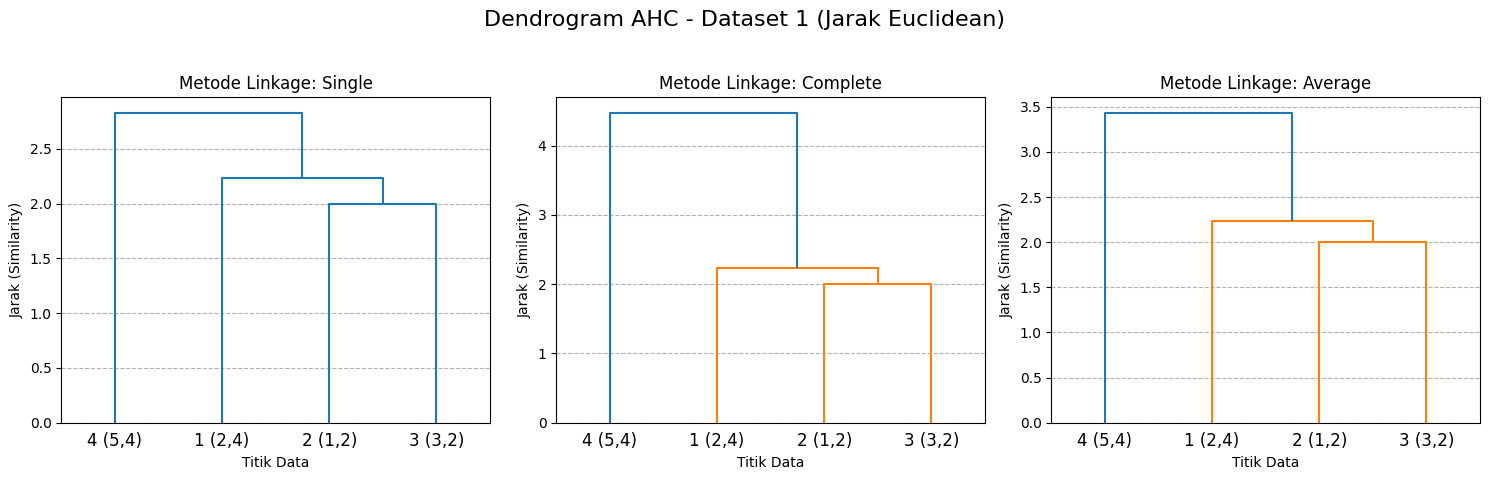


Matriks Penggabungan (Z) - Single Linkage:
   Cluster 1  Cluster 2     Jarak  Jumlah Data
0        1.0        2.0  2.000000          2.0
1        0.0        4.0  2.236068          3.0
2        3.0        5.0  2.828427          4.0

Interpretasi Z_single:


           LATIHAN 2: DATASET 2


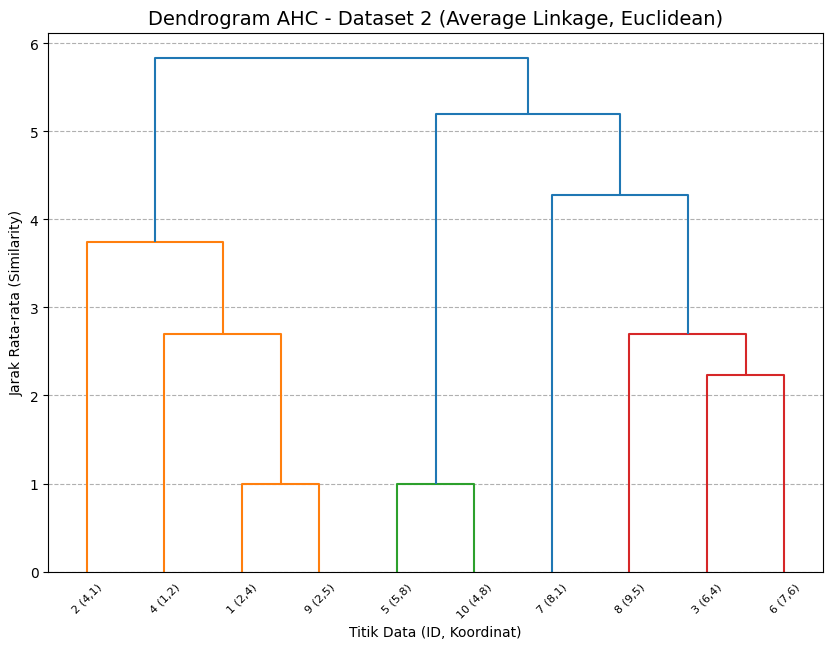


Matriks Penggabungan (Z) - Average Linkage Dataset 2:
   Cluster 1  Cluster 2     Jarak  Jumlah Data
0        0.0        8.0  1.000000          2.0
1        4.0        9.0  1.000000          2.0
2        2.0        5.0  2.236068          2.0
3        3.0       10.0  2.699173          3.0
4        7.0       12.0  2.699173          3.0
5        1.0       13.0  3.746655          4.0
6        6.0       14.0  4.275892          4.0
7       11.0       16.0  5.192275          6.0
8       15.0       17.0  5.831639         10.0

Langkah-langkah AHC (Average Linkage):
1. Gabung data 1 dan 9 pada jarak: 1.00
2. Gabung data 5 dan 10 pada jarak: 1.00
3. Gabung data 3 dan 6 pada jarak: 2.24
... dan seterusnya


In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# --- LATIHAN 1: DATASET 1 ---
print("=========================================")
print("           LATIHAN 1: DATASET 1")
print("=========================================")

# 1. Definisikan Dataset 1
# Kolom 1=Fitur x, Kolom 2=Fitur y
data1 = np.array([
    [2, 4], # Data 1
    [1, 2], # Data 2
    [3, 2], # Data 3
    [5, 4]  # Data 4
])

labels1 = ['1 (2,4)', '2 (1,2)', '3 (3,2)', '4 (5,4)']

# 2. Lakukan AHC menggunakan berbagai metode Linkage (Jarak Euclidean)

methods = ['single', 'complete', 'average']

plt.figure(figsize=(15, 5))
plt.suptitle('Dendrogram AHC - Dataset 1 (Jarak Euclidean)', fontsize=16)

for i, method in enumerate(methods):
    # Hitung Linkage
    # Metode Linkage: 'single', 'complete', 'average'
    # Jarak: default Euclidean
    Z = linkage(data1, method=method, metric='euclidean')

    # Visualisasi Dendrogram
    ax = plt.subplot(1, 3, i + 1)

    # Plot Dendrogram
    dendrogram(
        Z,
        orientation='top', # Orientasi ke atas
        labels=labels1,    # Label titik data
        ax=ax
    )

    ax.set_title(f'Metode Linkage: {method.capitalize()}')
    ax.set_xlabel('Titik Data')
    ax.set_ylabel('Jarak (Similarity)')
    ax.grid(axis='y', linestyle='--')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Tampilkan Matriks Penggabungan (Z) untuk melihat urutan dan jarak
print("\nMatriks Penggabungan (Z) - Single Linkage:")
Z_single = linkage(data1, method='single', metric='euclidean')
df_Z_single = pd.DataFrame(Z_single, columns=['Cluster 1', 'Cluster 2', 'Jarak', 'Jumlah Data'])
print(df_Z_single)
print("\nInterpretasi Z_single:")
# Baris 0: Gabungkan data ke-2 (indeks 1) dan ke-3 (indeks 2) pada jarak 2.0. Cluster baru adalah indeks 4.
# Baris 1: Gabungkan data ke-1 (indeks 0) dan Cluster indeks 4 pada jarak 2.236. Cluster baru adalah indeks 5.
# Baris 2: Gabungkan data ke-4 (indeks 3) dan Cluster indeks 5 pada jarak 2.828. Cluster baru adalah indeks 6 (Final).


# --- LATIHAN 2: DATASET 2 ---
print("\n\n=========================================")
print("           LATIHAN 2: DATASET 2")
print("=========================================")

# 1. Definisikan Dataset 2
data2 = np.array([
    [2, 4],  # 1
    [4, 1],  # 2
    [6, 4],  # 3
    [1, 2],  # 4
    [5, 8],  # 5
    [7, 6],  # 6
    [8, 1],  # 7
    [9, 5],  # 8
    [2, 5],  # 9
    [4, 8]   # 10
])

labels2 = [f'{i+1} ({x},{y})' for i, (x, y) in enumerate(data2)]

# 2. Lakukan AHC menggunakan Average Linkage (Jarak Euclidean)

method2 = 'average'
Z2 = linkage(data2, method=method2, metric='euclidean')

# 3. Visualisasi Dendrogram
plt.figure(figsize=(10, 7))
plt.title(f'Dendrogram AHC - Dataset 2 (Average Linkage, Euclidean)', fontsize=14)
dendrogram(
    Z2,
    orientation='top',
    labels=labels2,
    leaf_rotation=45,  # Memutar label agar tidak tumpang tindih
    leaf_font_size=8
)

plt.xlabel('Titik Data (ID, Koordinat)')
plt.ylabel('Jarak Rata-rata (Similarity)')
plt.grid(axis='y', linestyle='--')
plt.show()

# Tampilkan Matriks Penggabungan (Z)
print("\nMatriks Penggabungan (Z) - Average Linkage Dataset 2:")
df_Z2 = pd.DataFrame(Z2, columns=['Cluster 1', 'Cluster 2', 'Jarak', 'Jumlah Data'])
print(df_Z2)

# Contoh interpretasi langkah-langkah AHC (berdasarkan Matriks Z2):
print("\nLangkah-langkah AHC (Average Linkage):")
print(f"1. Gabung data 1 dan 9 pada jarak: {Z2[0, 2]:.2f}")
print(f"2. Gabung data 5 dan 10 pada jarak: {Z2[1, 2]:.2f}")
print(f"3. Gabung data 3 dan 6 pada jarak: {Z2[2, 2]:.2f}")
print(f"... dan seterusnya")